In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [10]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

4


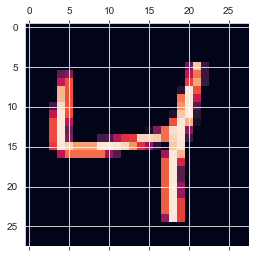

In [5]:
plt.matshow(X_train[2])
print(y_train[2])

In [6]:
X_train_flat = np.reshape(X_train, (X_train.shape[0] , 28*28))
X_test_flat = np.reshape(X_test, (X_test.shape[0] , 28*28))

X_train_flat = StandardScaler().fit_transform(X_train_flat)
X_test_flat = StandardScaler().fit_transform(X_test_flat)

In [7]:
X_train_flat.shape

(60000, 784)

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(28*28,),activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model.fit(X_train_flat , y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4425 - accuracy: 0.8859
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3274 - accuracy: 0.9179
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3027 - accuracy: 0.9224
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2857 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2747 - accuracy: 0.9263
Epoch 6/10
 748/1875 [==========>...................] - ETA: 2s - loss: 0.2612 - accuracy: 0.9277

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12360/2532781499.py", line 10, in <module>
    model.fit(X_train_flat , y_train, epochs = 10)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\eager\def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "C:\U

TypeError: object of type 'NoneType' has no len()

In [ ]:
model.evaluate(X_test_flat , y_test)

In [ ]:
y_predicted = model.predict(X_test_flat)

In [ ]:
y_predicted.shape

In [ ]:
y_pred_label = [np.argmax(i) for i in y_predicted]
y_pred_label

In [ ]:
y_test

In [ ]:
cf = confusion_matrix(y_pred_label, y_test)

In [ ]:
cf

In [ ]:
plt.figure(figsize=(12,10))
sn.heatmap(cf , annot=True , fmt='d')

In [ ]:
model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (28*28,), activation = 'relu'),
    keras.layers.Dense(10, input_shape=(100,), activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/adam/' , histogram_freq=1)

model1.compile(
    optimizer = 'adam',
    metrics = 'accuracy',
    loss = 'sparse_categorical_crossentropy'
)

model1.fit(X_train_flat, y_train, epochs = 10, callbacks=[tb_callback])

In [ ]:
model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (28*28,), activation = 'relu'),
    keras.layers.Dense(10, input_shape=(100,), activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/SGD/' , histogram_freq=1)

model1.compile(
    optimizer = 'SGD',
    metrics = 'accuracy',
    loss = 'sparse_categorical_crossentropy'
)

model1.fit(X_train_flat, y_train, epochs = 10, callbacks=[tb_callback])

In [ ]:
model1.evaluate(X_test_flat , y_test)

In [ ]:
y_predicted1 = model1.predict(X_test_flat)
y_pred_label1 = [np.argmax(i) for i in y_predicted1]
cf1 = confusion_matrix(y_pred_label1, y_test)
plt.figure(figsize=(12,10))
sn.heatmap(cf1 , annot=True , fmt='d')